In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Auto-reload for development
%load_ext autoreload
%autoreload 2

# Load raw incident data
df = pd.read_csv("../../data/raw/incidents.csv")
df.head()


,Company,Incident_date,Ride_name_dirty,Ride_name,Theme_Park,age_gender,description
0,Disney World,06/09/2022,Alien Swirling Saucers,Alien Swirling Saucers,Hollywood Studios,59 yof,guest with pre-existing condition sustained in...
1,Disney World,10/05/2014,Astro Orbiter,Astro Orbiter,Magic Kingdom,68 yom,"guest fell exiting vehicle, developed blood c..."
2,Disney World,12/03/2009,Astro Orbitor,Astro Orbiter,Magic Kingdom,40 yof,fractured left ankle exiting ride
3,Disney World,08/07/2022,Avatar Flight of Passage,Avatar Flight of Passage,Animal Kingdom,83 yom,guest with pre-existing condition was briefly ...
4,Disney World,4/19/22,Avatar Flight of Passage,Avatar Flight of Passage,Animal Kingdom,42 yof,guest with pre-existing condition had motion s...


In [8]:
# Basic structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Company          682 non-null    object
 1   Incident_date    682 non-null    object
 2   Ride_name_dirty  682 non-null    object
 3   Ride_name        682 non-null    object
 4   Theme_Park       682 non-null    object
 5   age_gender       682 non-null    object
 6   description      682 non-null    object
dtypes: object(7)
memory usage: 37.4+ KB


In [9]:
# Descriptive statistics (including non-numeric columns)
df.describe(include="all")

,Company,Incident_date,Ride_name_dirty,Ride_name,Theme_Park,age_gender,description
count,682,682,682,682,682,682,682
unique,3,648,221,112,9,169,527
top,Disney World,3/14/20,Space Mountain,Harry Potter and the Forbidden Journey,Magic Kingdom,68 yof,motion sickness
freq,502,2,36,44,177,15,28


In [6]:
# Count of missing values per column
df.isna().sum()

Company            0
Incident_date      0
Ride_name_dirty    0
Ride_name          0
Theme_Park         0
age_gender         0
description        0
dtype: int64

In [7]:
# Count of unique values per column
df.nunique().sort_values()

Company              3
Theme_Park           9
Ride_name          112
age_gender         169
Ride_name_dirty    221
description        527
Incident_date      648
dtype: int64

In [11]:
df["Company"].value_counts()

Company
Disney World    502
Universal       179
Universal:        1
Name: count, dtype: int64

In [12]:
df["Theme_Park"].value_counts()

Theme_Park
Magic Kingdom           177
Animal Kingdom           97
Islands of Adventure     95
Epcot                    91
Hollywood Studios        80
Universal Studios        68
Typhoon Lagoon           32
Blizzard Beach           26
Volcano Bay              16
Name: count, dtype: int64

In [13]:
df["Ride_name"].value_counts().head(20)

Ride_name
Harry Potter and the Forbidden Journey        44
Space Mountain                                39
Expedition Everest                            38
Mission: Space                                36
Rock 'n' Roller Coaster Starring Aerosmith    23
Kilimanjaro Safaris Expedition                21
Revenge of the Mummy                          17
The Twilight Zone Tower of Terror             16
Surf Pool                                     16
Star Tours: The Adventure Continues           16
Avatar Flight of Passage                      15
Hollywood Rip Ride Rocket                     14
Dinosaur                                      14
Buzz Lightyears Space Ranger Spin             13
Spaceship Earth                               12
Big Thunder Mountain Railroad                 12
Haunted Mansion                               12
Pirates of the Caribbean                      11
Dragon Challenge                              11
The Incredible Hulk Coaster                   11
Name: coun

In [14]:
df["Ride_name_dirty"].sample(10)


536                                           Star Tours
254                        The Hollywood Rip Ride Rockit
440    Rock Ã¢ÂÂnÃ¢ÂÂ Roller Coaster Staring Aero...
666                                     Toy Story Mania!
33                                        Buzz Lightyear
617               The Many Adventures of Winnie the Pooh
345                                        Mission Space
574                             Typhoon Lagoon Surf Pool
139                                   Expedition Everest
146                                   Expedition Everest
Name: Ride_name_dirty, dtype: object

In [15]:
df["age_gender"].value_counts().head(10)

age_gender
68 yof    15
57 yof    12
57 yom    11
72 yof    11
59 yom    11
54 yom    10
43 yof    10
71 yof    10
69 yof    10
51 yom     9
Name: count, dtype: int64

<Axes: >

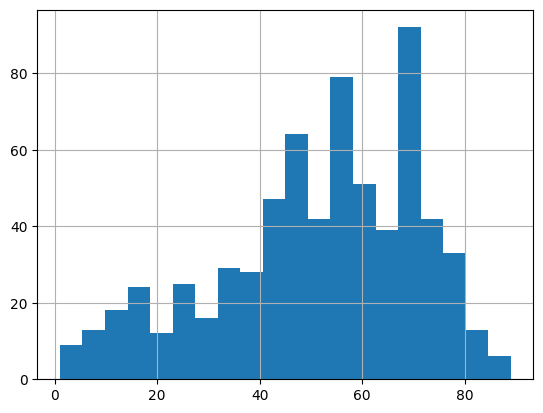

In [16]:
# Extract age for inspection
df["age"] = df["age_gender"].str.extract(r"(\d+)")
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df["age"].hist(bins=20)

In [2]:
df["Incident_date"].sample(20)

584       8/14/08
304    12/02/2016
294       1/17/18
648      06/18/09
314    08/12/2016
214       4/16/17
2      12/03/2009
291      12/22/08
577       6/14/20
57     10/10/2013
497       7/29/14
662       9/25/22
322      11/15/06
213    04/08/2017
97     11/07/2012
569       6/14/16
168    12/11/2012
492       8/20/16
550    07/27/2009
455       6/25/16
Name: Incident_date, dtype: object

In [4]:
#flexible parsing force
df["Incident_date_parsed"] = pd.to_datetime(df["Incident_date"], dayfirst=False, errors="coerce")

In [5]:
#verify failing dates
failed = df[df["Incident_date_parsed"].isna()]
print(f"Failed to parse: {len(failed)} rows")
failed["Incident_date"].value_counts().head(10)

Failed to parse: 406 rows


Incident_date
3/18/13     2
7/24/13     2
7/16/11     2
6/24/15     2
3/24/22     2
07/17/03    2
3/14/20     2
2/22/06     2
3/13/21     2
04/13/09    2
Name: count, dtype: int64

In [18]:
df["description"].sample(5)

417                                     lower back pain.
576    loss of consciousness: history of heart condition
462        guest with pre-existing condition had seizure
374                                  felt dizzy and sick
297    developed rash before boarding; rash later wor...
Name: description, dtype: object